# 任务与奖赏

强化学习是机器学习的一个重要分支。在强化学习中包含两种基本元素：状态与动作，在某个状态下执行某种动作，这便是一种策略。学习器要做的是不断地探索学习，得到较好的策略。

若将状态看作为属性，动作看作为标记，易知：监督学习和强化学习都是在试图寻找一个映射，从已知属性/状态推断出标记/动作，这样强化学习中的策略相当于监督学习中的分类/回归器。但在实际问题中，强化学习并没有监督学习那样的标记信息，通常都是在尝试动作后才能获得结果，因此强化学习是通过反馈的结果信息不断调整之前的策略，从而算法能够学习到：在什么样的状态下选择什么样的动作可以获得最好的结果。

强化学习任务通常用马尔可夫决策过程来描述：机器处于某一环境中，每个状态为机器对当前环境的感知，机器可以通过动作作用在当前的状态上，然后潜在的转移函数P将使得环境从当前状态按某种概率转移到另一种状态，同时，环境会根据潜在的奖赏函数R反馈给机器一个奖赏。综合而言，强化学习主要包括四个要素：状态、动作、转移概率和奖赏函数。

    状态（X）：机器对环境的感知，所有可能的状态称为状态空间；
    动作（A）：机器所采取的动作，所有能采取的动作构成动作空间；
    转移函数（P）：当执行某个动作后，当前状态会通过转移函数转移到另一个状态；
    奖赏函数（R）：在状态转移的同时，环境给反馈给机器一个奖赏。
 

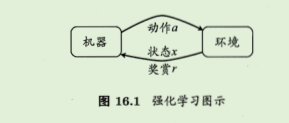

#  K摇摆赌博机

首先考虑强化学习最简单的情形：最大化单步奖赏，即仅考虑一步操作。我们需要知道每个动作带来的期望奖赏值，这样便能选择奖赏值最大的动作来执行。若每个动作的奖赏值为确定值，则只需要将每个动作尝试一遍即可，但大多数情形下，一个动作的奖赏值来源于一个概率分布，因此需要进行多次的尝试。

单步强化学习任务对应了一个理论模型：K-摇臂赌博机（K-armed bandit）。一般我们尝试动作的次数是有限的，那如何利用有限的次数进行有效地探索呢？这里有两种基本的想法：

    仅探索法：将尝试的机会平均分给每一个动作，即轮流执行，最终将每个动作的平均奖赏作为期望奖赏的近似值。
    仅利用法：将尝试的机会分给当前平均奖赏值最大的动作，隐含着让一部分人先富起来的思想。

事实上，“探索”（估计摇臂的优劣）和“利用”（选择当前最优摇臂）两者是互相矛盾的，因为尝试次数有限，加强一方则会削弱另一方，这就是强化学习所面临的“探索-利用窘境”。显然，想要累积奖赏最大，则必须在探索和利用之间取得较好的折中。


# ε-贪心

ε-贪心法基于一个概率来对探索和利用进行折中，具体而言：在每次尝试时，以ε的概率进行探索，即以均匀概率随机选择一个动作；以1-ε的概率进行利用，即选择当前最优的动作。ε-贪心法只需记录每个动作的当前平均奖赏值与被选中的次数，便可以增量式更新。

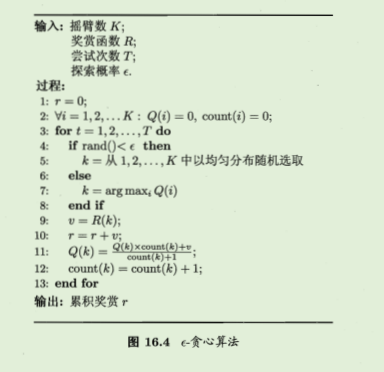

# Softmax

Softmax算法则基于当前每个动作的平均奖赏值来对探索和利用进行折中，Softmax函数将一组值转化为一组概率，值越大对应的概率也越高，因此当前平均奖赏值越高的动作被选中的几率也越大。Softmax函数如下所示：

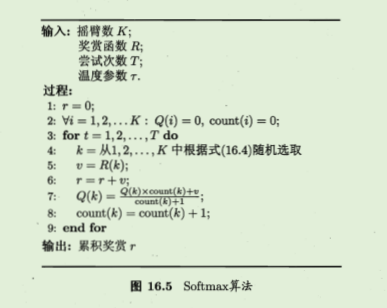

# 有模型学习

对于多步强化学习任务，若学习任务对应的马尔科夫决策过程四元组（即状态空间、动作空间、转移函数和奖赏函数）已知，这样的情形称为“模型已知”，即机器已对环境进行了建模，能在机器内部模拟出与环境相同或近似的状况。

在已知模型的环境中学习称为“有模型学习”(model-based learning)。假设状态空间和动作空间均为有限，即均为离散值，这样我们不用通过尝试便可以对某个策略进行评估。
 

## 策略评估

在模型已知时，对任意策略π

π能估计出该策略带来的期望累积奖赏。估计策略的累积奖赏有两种值函数：

    状态值函数：从状态x出发，使用策略π

π带来的累积奖赏
状态-动作值函数：从状态x出发，执行动作a后再使用策略π

    π带来的累积奖赏

根据累积奖赏的定义，有状态值函数：
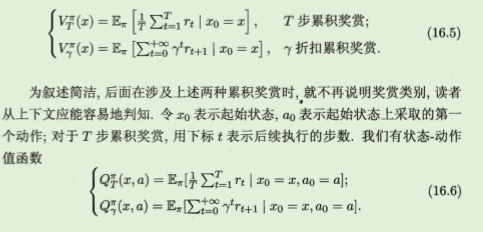

递归等式计算值函数就是一种动态规划算法，即以填表格的形式自底向上，先求解每个状态的单步累积奖赏，再求解每个状态的两步累积奖赏，一直迭代逐步求解出每个状态的T步累积奖赏。基于T步累积奖赏的策略评估算法流程如下所示：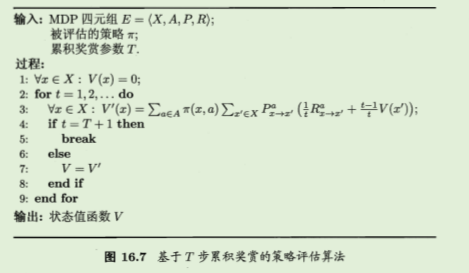

## 策略改进

理想的策略应能使得每个状态的累积奖赏之和最大，简单来理解就是：不管处于什么状态，只要通过该策略执行动作，总能得到较好的结果。因此对于给定的某个策略，我们需要对其进行改进，从而得到最优的值函数。

最优Bellman等式改进非最优策略的方式为：将策略选择的动作改为当前最优的动作，而不是像之前那样对每种可能的动作进行求和。易知：选择当前最优动作相当于将所有的概率都赋给累积奖赏值最大的动作，因此每次改进都会使得值函数单调递增。

## 策略迭代与值迭代

将策略评估与策略改进结合起来即可得到求解最优解的方法，即策略迭代：从初始策略（随机策略）出发，先策略评估后策略改进，然后再评估改进的策略，再一步步改进策略，…不断迭代进行策略评估和改进，直到策略收敛、不再改变为止。
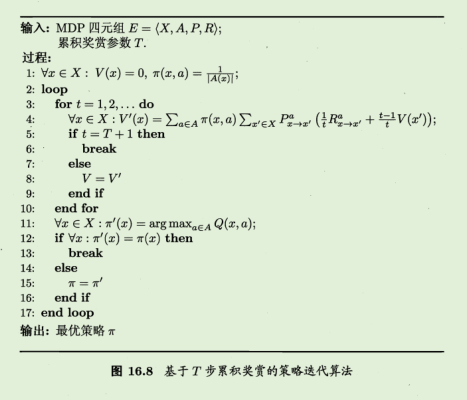

# 免模型学习

有模型学习是基于四元组已知的前提进行讨论的，但是在现实任务中，环境的转移概率、奖赏函数往往很难得知，甚至很难知道环境中一共有多少状态。若学习算法不依赖环境建模，则称为“免模型学习”，它比有模型学习要困难得多。
## 蒙特卡罗强化学习

在免模型的情形下，由于模型未知无法做全概率展开，策略迭代算法首先遇到的问题就是无法进行策略评估。一种直接的策略评估替代方法便是多次采样，然后取平均累积奖赏来作为期望累积奖赏的近似，这称为“蒙特卡罗强化学习”。

    蒙特卡罗强化学习正是基于采样来估计状态-动作值函数：对采样轨迹中的每一对状态-动作，记录其后的奖赏值之和，作为该状态-动作的一次累积奖赏，通过多次采样后，使用累积奖赏的平均作为状态-动作值的估计，并引入ε-贪心策略保证采样的多样性。

同策略蒙特卡罗学习算法：被评估和被改进的是同一个策略


# 模仿学习

在现实任务中，机器所能获得的反馈除了多步决策后的累积奖赏，还能得到人类专家的决策过程范例。从范例中学习，称为“模仿学习”。

直接模仿学习：直接模仿人类专家的“状态-动作对”可显著缓解强化学习任务中多步决策搜索空间巨大，基于累积奖赏学习很多步之前的合适决策难度过大的问题。

逆强化学习：在很多任务中，设计奖赏函数往往相当困难，从人类专家提供的范例中反推出奖赏函数有利与解决该问题
